In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random
#import cv2
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist

## K-Means Algorithm 


Numero de obervacoes:  800
Numero de atributos (features):  2


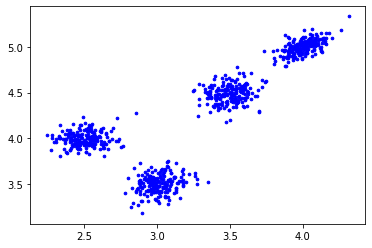

In [86]:
# loading data set
# data (NxM) = DataFrame a ser clusterizado N observacoes e M features
data = loadmat('fcm_dataset.mat')
data = pd.DataFrame(data['x'])
lendata = len(data)
print('Numero de obervacoes: ', lendata)
nfeatures = data.shape[1]
print('Numero de atributos (features): ', nfeatures)

data_np = data.values
for i in range(len(data_np)):
        plt.scatter(data_np[i][0], data_np[i][1], s=7, color = 'blue')

In [87]:
# Inicializacao
# partitions: np.array(N x K) - matriz de partições (pertinencia da observacao ao K-esimo grupo)

K = 4  # numero de grupos (clusters)

partitions = np.zeros([lendata, K])
idx = np.zeros(lendata)

# inicializacao aleatoria da matriz de partições
for i in range(lendata):
    rnd = np.random.randint(K)
    partitions[i][rnd] = 1
    idx[i] = rnd


In [88]:
print(partitions)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [89]:
print(idx)

[0. 0. 1. 0. 3. 2. 3. 2. 3. 0. 3. 3. 3. 3. 2. 1. 2. 1. 0. 1. 3. 1. 0. 3.
 3. 0. 1. 2. 1. 3. 0. 2. 3. 0. 1. 2. 3. 2. 2. 2. 1. 3. 2. 1. 1. 1. 0. 2.
 3. 0. 1. 0. 1. 0. 2. 3. 0. 3. 3. 0. 3. 2. 2. 3. 2. 1. 3. 2. 0. 3. 1. 3.
 1. 1. 2. 0. 3. 3. 2. 0. 2. 0. 2. 2. 0. 2. 2. 3. 3. 3. 0. 0. 2. 3. 1. 0.
 2. 2. 0. 1. 2. 2. 0. 2. 3. 2. 2. 2. 3. 0. 0. 2. 2. 1. 2. 3. 0. 1. 1. 3.
 2. 0. 3. 1. 1. 3. 1. 1. 3. 3. 0. 0. 0. 2. 3. 3. 0. 0. 0. 3. 2. 1. 0. 3.
 2. 1. 2. 1. 0. 2. 3. 3. 2. 0. 1. 2. 3. 0. 2. 0. 1. 2. 2. 2. 2. 0. 3. 3.
 1. 2. 1. 1. 0. 3. 2. 2. 2. 3. 3. 3. 1. 3. 0. 2. 0. 3. 1. 3. 2. 3. 3. 0.
 3. 0. 1. 0. 3. 2. 1. 3. 0. 2. 1. 2. 1. 1. 1. 0. 3. 1. 3. 2. 1. 3. 3. 3.
 3. 1. 1. 2. 0. 2. 0. 3. 3. 2. 2. 0. 1. 0. 2. 0. 3. 0. 2. 0. 3. 3. 1. 0.
 0. 2. 0. 3. 2. 0. 1. 2. 3. 1. 0. 0. 3. 1. 0. 3. 3. 3. 1. 0. 0. 3. 0. 1.
 2. 3. 1. 2. 1. 3. 0. 0. 3. 1. 3. 2. 3. 3. 2. 1. 3. 0. 3. 0. 1. 3. 3. 0.
 2. 0. 3. 0. 2. 2. 3. 1. 2. 1. 1. 0. 3. 2. 3. 2. 3. 2. 1. 1. 1. 3. 3. 2.
 2. 2. 0. 3. 1. 0. 1. 3. 0. 2. 1. 1. 1. 1. 2. 3. 2.

In [90]:
# funcao que obtem os centroides
# centroids: np.array(K x N) - centroides (K vetores de M features) de cada grupo
def calc_centroids(data, partitions):
    nfeatures = data.shape[1]
    K = partitions.shape[1]
    centroids = np.zeros([K,nfeatures])
    data_np = data.values
    for i in range(K):
        idx_nonzero =  np.flatnonzero(partitions[:,i])
        data_i = data_np[idx_nonzero,:]
        centroids[i] = np.mean(data_i, axis=0)
    return centroids

In [91]:
cent = np.zeros([K,nfeatures])
cent = calc_centroids(data, partitions)
print(cent)

[[3.25614421 4.19906745]
 [3.21179281 4.23252459]
 [3.26175019 4.27506455]
 [3.27983133 4.27374825]]
